# Iris Classification and EDA 

### Objective 
This repository aims to build a classificaton model for Iris type-Versicolor, Setosa, or Virginica, give the information of length and width of sepal and petal respectively. 

### Data availability
I use the Iris dataset from UCI machine learning website: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

Data dictionary is available at: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names


![Chart Image](https://user-images.githubusercontent.com/31974451/36004466-be616074-0ce7-11e8-81b5-f2a35dde1ea3.jpg)

# 1. Fetching Abalone Data

## 1.1 Importing necessary libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 1.2 Reading data from web source

In [17]:
iris_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names =  ["sepal length", "sepal width", "petal length", "petal width", "class"]
iris_df = pd.read_csv(iris_data, 
                         header=None, 
                         names = names)

'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [27]:
iris_df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
iris_df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris_df["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#iris_df['class'].replace('Iris-setosa', 0,inplace=True)
#iris_df['class'].replace('Iris-versicolor', 1,inplace=True)
#iris_df

# 2. EDA 

## 2.1 Pairplot Scatterplot by Class

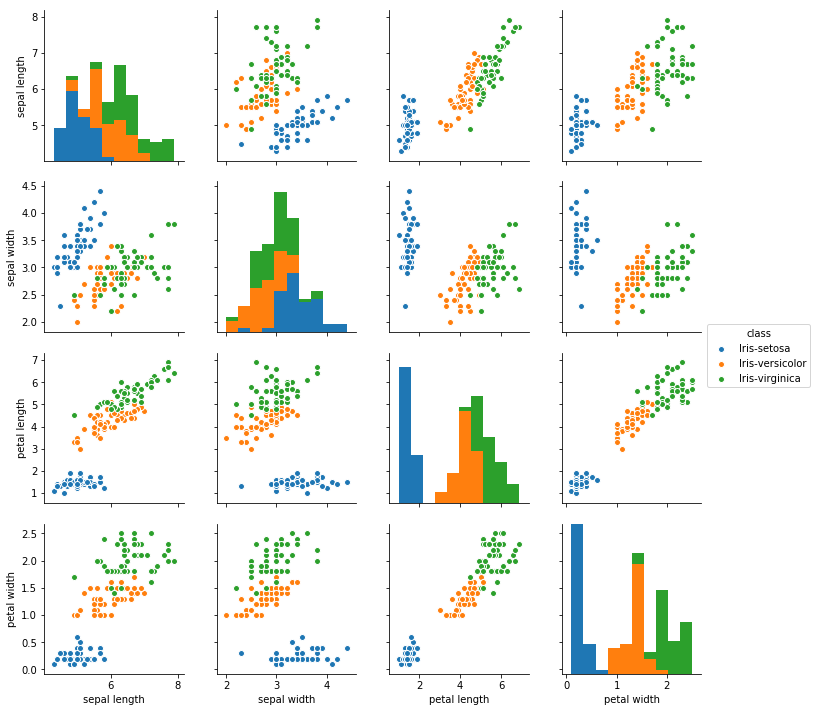

In [11]:
sns.pairplot(data = iris_df, hue ="class")

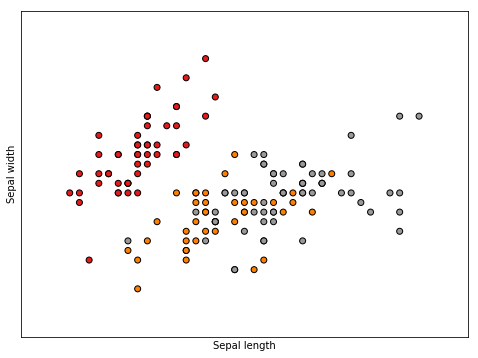

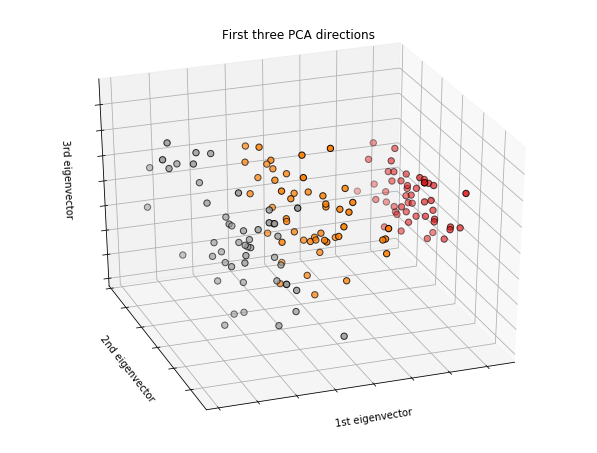

In [18]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()


0.93333333333333335

The accuracy of the KNN Model is 1.0


The accuracy of SVC is 0.966666666667


TypeError: unhashable type: 'slice'

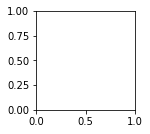

In [47]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

#for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
#                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    #X = iris.data[:, pair]
    #y = iris.target

    # Train
clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
plt.subplot(2, 3, pairidx + 1)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()

## 2.2 Correlation Heatmap

In [ ]:
corr = iris_df.corr()
corr

In [ ]:
plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="GnBu")

Interestingly, sepal width has a negative correlation with all other parameters, whereas sepal length, petal length and petal width are highly correlated. This is because species Iris-setosa has a very weird growth pattern shown in pairplot, as its sepal width varies a lot keeping the sepal length and width constant.

In [ ]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

## 2.3 Violin plot by Class

In [69]:
my_df =iris_df[iris_df.class != 'Iris-setosa'].copy()

SyntaxError: invalid syntax (<ipython-input-69-3b7c4ed40921>, line 1)

In [ ]:
sns.set(style="whitegrid", palette="pastel", color_codes=True)

#Draw a nested violinplot and split the violins for easier comparison
plt.subplots(figsize=(17,14))
sns.violinplot(x="sepal length", y="petal length", hue="class", data=my_df, split=False, inner="quart")
sns.despine(left=True)


## 2.3 Sepal Length Density plot by Class

In [ ]:
from ggplot import *
ggplot(iris_df,aes(x="sepal length", color = "class")) + geom_density(position = "stack")

In [ ]:
ggplot(iris_df,aes(x="sepal width", color = "class")) + geom_density(position = "stack")

In [ ]:
ggplot(iris_df,aes(x="petal length", color = "class")) + geom_density(position = "stack")

In [ ]:
ggplot(iris_df,aes(x="petal width", color = "class")) + geom_density(position = "stack")

##### From density plot, we can clearly see that 

### further explore if Rings is dependent on gender

In [ ]:
sns.barplot(x = "Sex", y = "Rings", data = abalone_df)
abalone_df[["Sex", "Rings"]].groupby(["Sex"], as_index = False).mean()

# 3. Machine Learning Classification Model for Class

In [ ]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.preprocessing import StandardScaler
#train,test=train_test_split(train_df,test_size=0.2,random_state=0,stratify=abalone_data['Sex'])

### Split left-hand side and right-hand side variables 

In [ ]:
X = iris_df.loc[:,['sepal length','sepal width','petal width','petal length']]
y = iris_df.loc[:,'class'] #note y should be a series not a dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Split Data into Test and Training Set

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## 3.1 Naive Bayes

In [ ]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
# y_pred = gaussian.predict(X_test)
score_gaussian = gaussian.score(X_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

## 3.2 SVC model 

In [ ]:
# Support Vector Classifier (SVM/SVC)
svc = SVC(gamma=0.22)
svc.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_svc = svc.score(X_test,y_test)
print('The accuracy of SVC is', score_svc)

## 3.3 Decision Tree Model

In [ ]:
# Decision Tree Classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
score_decisiontree = clf.score(X_test,y_test)
print('The accuracy of the Decision Tree Model is', score_decisiontree)

## 3.4 KNN Model 

In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
#y_pred = knn.predict(X_test)
score_knn = knn.score(X_test,y_test)
print('The accuracy of the KNN Model is',score_knn)


# 4. Cross Validation 

In [ ]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Naive Bayes','Linear Svm','Decision Tree','KNN']
models=[GaussianNB(), svm.SVC(kernel='linear'),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=9)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
models_dataframe=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
models_dataframe


#### It seems that logistic regression is a good model for Abalone dataset, since it gives the highest prediction score of 0.54489 outweighting other models. However, due to the limit of variables and number of records, if aiming to achieve higher score for prediction, we need to find other more representitive variables to anticipate the sex of Abalone in the future.